(ch:normal-distribution)=
# 정규 분포 (준비중)

**기본 설정**

`numpy`와 `pandas` 라이브러리를 각각 `np`와 `pd`로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`로,
`seaborn`을 `sns`로 불러온다.
`seaborn` 라이브러리는 통계 관련 데이터의 정보를 보다 세련되고 정확하게 전달하는 그래프를 그리는 도구를 제공한다.
`matplotlib` 라이브러리를 바탕으로 만들어져서 함께 사용해도 된다.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

그래프 스타일을 `seaborn`에서 제공하는 `white` 스타일로 지정한다.

In [6]:
sns.set_style("white")

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [7]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**주요 내용**

확률과 통계에서 가장 유명한 연속 확률 분포인 정규 분포를 소개한다.

- 가우스 함수
- 표준화
- 정규 분포 연산
- 정규 분포 활용

## 가우스 함수

**정규 분포**<font size='2'>normal distribution</font>는 
길이, 크기, 높이 등의 데이터처럼 실생활 또는 자연에서 얻어지는 값을
다룰 때 자주 접하는 확률 분포다.
예를 들어 아래 사례들이 일반적으로 정규 분포를 따른다.

- 사람들의 키 또는 몸무게의 분포, 
- 대학생들의 성적 평점의 분포
- 초등학생들의 통학시간의 분포

정규 분포의 확률 밀도 함수는 아래 가우스 함수로 정의된다.
단, $\mu$는 평균값을, $\sigma$는 표준편차를 가리킨다.

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}}\, \exp(-\frac{(x-\mu)^2}{2\sigma^2})
$$

아래 `f_gaussian()` 함수가 가우스 함수를 구현한다.

- `loc=0`: 평균값. 기본값 0.
- `scale=1`: 표준편차. 기본값 1.

In [8]:
def f_gaussian(x, loc=0, scale=1):
    return (1 / (scale * np.sqrt(2 * np.pi))) * np.exp(-(x - loc)**2 / (2 * scale**2))

아래 코드는 평균값 $\mu$와 표준편차 $\sigma$에 따라 가우스 함수의 그래프가
어떻게 달라지는지 보여준다.

- 그래프의 봉우리가 $\mu$일 때 가장 높고 $\mu$를 중심으로 좌우 대칭이다.
- 곡선은 $x$축과 절대로 만나지 않으면서 $\mu$에서 멀어질 수록 점점 $x$축에 가까워진다.  
- $\sigma$ 가 커지면 곡선은 넓고 평평해진다.  
- 곡선과 $x$축 사이의 면적은 항상 1이다.

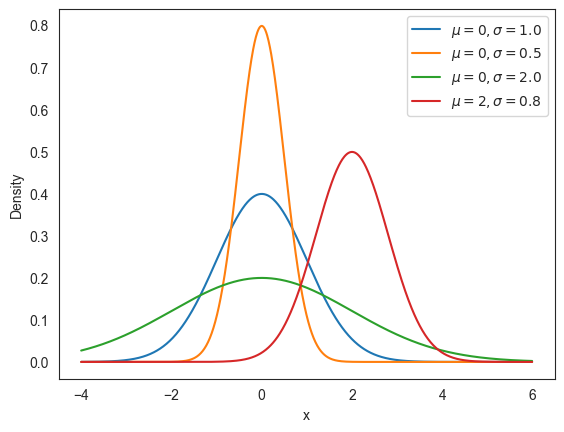

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = np.arange(-4, 6, 0.01)

ax.plot(x, f_gaussian(x, loc=0, scale=1.0), label=r'$\mu = 0, \sigma = 1.0$')
ax.plot(x, f_gaussian(x, loc=0, scale=0.5), label=r'$\mu = 0, \sigma = 0.5$')
ax.plot(x, f_gaussian(x, loc=0, scale=2.0), label=r'$\mu = 0, \sigma = 2.0$')
ax.plot(x, f_gaussian(x, loc=2, scale=0.8), label=r'$\mu = 2, \sigma = 0.8$')

ax.set_xlabel('x')
ax.set_ylabel(r'Density')

plt.legend()
plt.show()

확률 변수 $X$가 평균값이 $\mu$이고 분산이 $\sigma^2$인
정규 분포를 따를 때 아래와 같이 표기한다.  

$$
X \sim N(\mu, \sigma^2)
$$

앞서 직접 구현한 정규 분포의 확률 밀도 함수(pdf) `f_gaussian()` 등 정규 분포와
관련된 모든 기능을 `scipy.stats` 모듈의 `norm` 객체가 제공한다.

In [11]:
from scipy.stats import norm

예를 들어 `norm.pdf()`가 `f_gaussian()`에 해당하며,
이어지는 코드에서 대신 사용된다.

In [12]:
f_gaussian = norm.pdf

반면에 `norm.cdf()` 함수는 정규 분포의 누적 분포 함수(cdf)를 가리킨다.

In [13]:
F_gaussian = norm.cdf

두 함수 모두 `loc=0`과 `scale=1`을 키워드 인자로 사용하며
각각 분포의 평균값과 표준편차를 지정한다.

### 표준 정규 분포

표준 정규 분포는 평균값이 0, 표준편차가 1인 정규 분포를 가리킨다.
아래 코드는 표준 정규 분포의 확률 밀도 함수만 따로 떼어 그래프로 나타낸다.

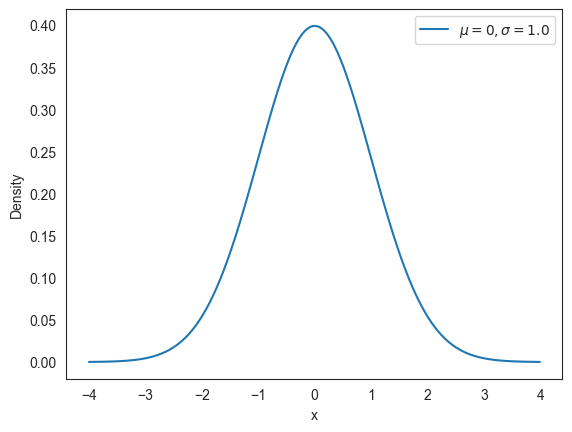

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = np.arange(-4, 4, 0.01)

ax.plot(x, f_gaussian(x, loc=0, scale=1.0), label=r'$\mu = 0, \sigma = 1.0$')

ax.set_xlabel('x')

plt.xlabel('x')
plt.ylabel(r'Density')
plt.legend()

plt.show()

### 정규 분포 확률

아래 그래프는 
$X \sim N(0, 1)$일 때, $X$가 $a$보다 같거나 작은 값을 취할 확률 $P(X \leq a)$를
영역으로 보여준다.
즉, $a$ 보다 같거나 작은 구간에서 확률 밀도 함수 곡선과 $x$-축 사이의 면적이다.

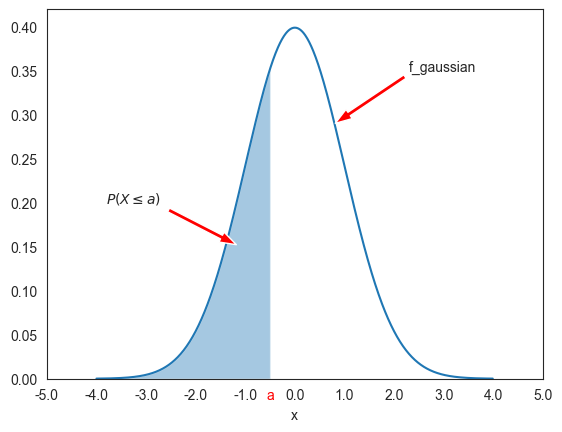

In [15]:
x = np.arange(-4, 4, 0.01)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# norm.pdf()
ax.plot(x, f_gaussian(x, 0, 1))

# -2에서 1 사이의 면적 표시
point_a = -0.5
ax.fill_between(x, f_gaussian(x), where=(x <= point_a), alpha=0.4)

# 함수명 주석 달기
ax.annotate(r'f_gaussian', xy=(.8, f_gaussian(.8)), xytext=(2.3, 0.35),
            arrowprops=dict(facecolor='red', shrink=0.01, width=3, headwidth=8))

ax.annotate(r'$P(X \leq a)$', xy=(-1.1 ,0.15), xytext=(-3.8, 0.2),
            arrowprops=dict(facecolor='red', shrink=0.05, width=3, headwidth=8))

# point_a를 눈금으로 추가 표시
x_ticks = np.append(ax.get_xticks(), point_a)
x_ticks_ = np.append(ax.get_xticks(), 'a') # 실제로 보이는 눈금 기호
ax.set_xticks(x_ticks, x_ticks_)
ax.get_xticklabels()[-1].set_color("red") # a 눈금 색 지정

ax.set_xlabel('x')
ax.set_ylim(0, 0.42)

plt.show()

위 그래프는 `a=-0.5`일 때의 $P(X \leq a)$를 보여주며 실제 계산은 `F_gaussian()` 함수를 
이용하면 된다.

In [16]:
F_gaussian(-0.5)

0.308538

반면에 아래 그래프는 
$X \sim N(0, 1)$일 때, $X$가 $a$와 $b$사이의 값을 취할 확률 $P(a \le X \le b)$를
구간 $a$와 $b$ 사이에서 확률 밀도 함수 곡선과 $x$-축 사이의 면적으로 보여준다.

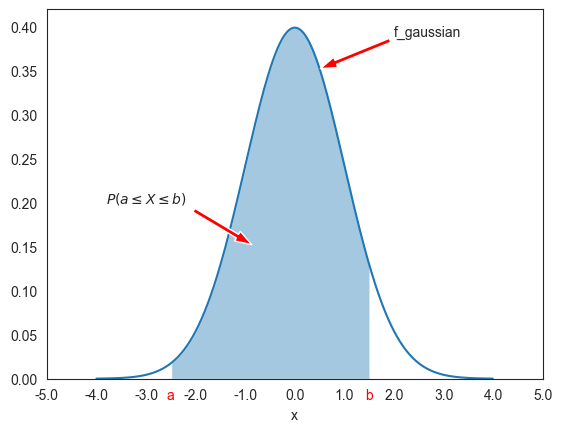

In [17]:
x = np.arange(-4, 4, 0.01)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# norm.pdf()
ax.plot(x, f_gaussian(x, 0, 1))

# -2에서 1 사이의 면적 표시
point_a = -2.5
point_b = 1.5
ax.fill_between(x, f_gaussian(x), where=(point_a <= x) & (x <= point_b), alpha=0.4)

# 함수명 주석 달기
ax.annotate(r'f_gaussian', xy=(0.5, f_gaussian(0.5)), xytext=(2, 0.39),
            arrowprops=dict(facecolor='red', shrink=0.01, width=3, headwidth=8))

ax.annotate(r'$P(a \leq X \leq b)$', xy=(-.8 ,0.15), xytext=(-3.8, 0.2),
            arrowprops=dict(facecolor='red', shrink=0.05, width=3, headwidth=8))

# point_a와 point_b를 눈금으로 추가 표시
x_ticks = np.append(ax.get_xticks(), [point_a, point_b])
x_ticks_ = np.append(ax.get_xticks(), ['a', 'b']) # 실제로 보이는 눈금 기호
ax.set_xticks(x_ticks, x_ticks_)
ax.get_xticklabels()[-2].set_color("red") # a 눈금 색 지정
ax.get_xticklabels()[-1].set_color("red") # b 눈금 색 지정

ax.set_xlabel('x')
ax.set_ylim(0, 0.42)

plt.show()

위 그래프는 `a=-2.5`이고 `b=1.5`일 때의 $P(a \leq X \leq b)$를 보여주며 실제 계산은 `F_gaussian()` 함수를 
이용한다.

In [19]:
F_gaussian(1.5) - F_gaussian(-2.5)

0.926983

**예제: 20대 한국 남성 키 데이터**

아래 코드는 20대 한국 남성 1천명의 키 데이터를 데이터프레임으로 불러온다.

In [20]:
height_men20 = pd.read_csv(data_url+"height_men20.csv", header=0)

데이터프레임에는 20대 남성들의 키 정보만 담겨 있다.
키의 분포를 확인하기 위해 밀도 히스토그램과 
커널 밀도 추정(KDE) 기법으로 찾아진 확률 밀도 함수의 그래프를 함께 그린다.

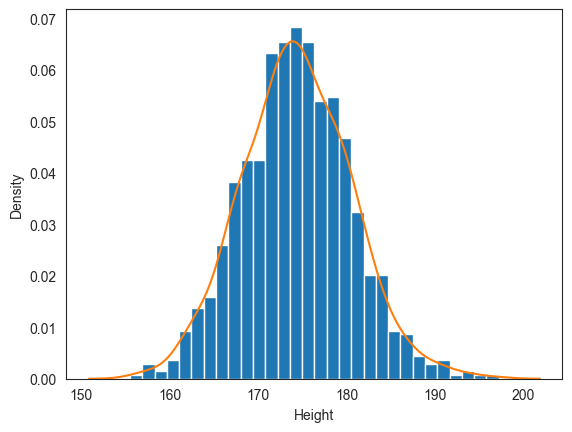

In [21]:
fig, ax = plt.subplots()

# 남성 신장 히스토그램
height_men20.plot.hist(ax=ax, bins=30, density=True, legend=False)

# 추정된 확률 밀도 함수 그래프
kde = sns.kdeplot(ax=ax, data=height_men20['Height'])

ax.set_xlabel('Height')
ax.set_ylabel('Density')

plt.show()

그래프를 보면 평균값을 중심으로 거의 좌우 대칭을 이루는 분포를 따른다.
즉, 20대 한국 남성 키가 정규 분포를 따르는 것처럼 보인다.
이를 확인하기 위해 먼저 평균값과 분산을 계산한다.

In [23]:
X_describe = height_men20.describe()
X_describe

,Height
count,1000.000000
mean,174.332200
std,6.162819
min,155.500000
25%,170.275000
50%,174.300000
75%,178.500000
max,197.200000


- 20대 남성 키의 평균값

In [24]:
mu_X = X_describe.loc['mean', 'Height']
mu_X

174.332200

- 20대 남성 키의 표준편차

In [25]:
sigma_X = X_describe.loc['std', 'Height']
sigma_X

6.162819

아래 코드는
`mu_X`와 `sigma_X`를 각각 평균값과 표준편차로 갖는 정규 분포의 확률 밀도 함수 그래프와
앞서 KDE 기법으로 추정된 확률 밀도 함수 그래프가 거의 동일함을 보여준다.

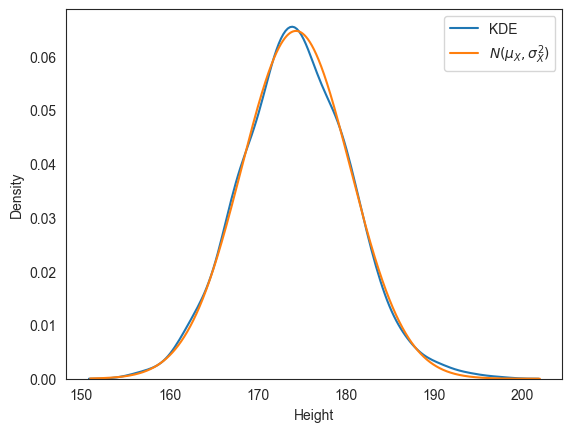

In [39]:
fig, ax = plt.subplots()

# 20대 남성 키 데이터에 대해 KDE 기법으로 추정된 확률 밀도 함수 그래프
kde = sns.kdeplot(ax=ax, data=height_men20['Height'], label='KDE')

# mu_X와 sigma_X를 이용한 정규 분포의 확률 밀도 함수 그래프
x = np.arange(151, 202, 0.01)
f = lambda y: f_gaussian(y, mu_X, sigma_X)
plt.plot(x, f(x), label=r'$N(\mu_X, \sigma_X^2)$')

ax.set_xlabel('Height')
ax.set_ylabel('Density')

ax.legend()

plt.show()

결론적으로 20대 한국 남성들의 키를 가리키는 확률 변수 $X$는
다음 정규 분포를 따른다.

$$
X \sim N(\mu_X, \sigma_X^2)
$$

이를 코드로 구현하면 다음과 같다.
`norm` 객체를 활용할 때 함수처럼 평균값과 표준편차를 지정할 수 있음에 주의한다.

In [41]:
X = norm(loc=mu_X, scale=sigma_X)

이렇게 정의된 확률 변수의 확률 밀도 함수(pdf)와 누적 분포 함수(cdf) 등은 추가 인자 없이 바로 활용된다.
예를 들어 아래 코드는 임의로 선택된 20대 남성의 키가 평균값 이하일 확률이 50%임을 확인해준다.

In [44]:
X.cdf(mu_X)

0.500000

$X$의 평균은 174.43cm이고, 표준편차는 5.89cm이다.  
반면에 20대 한국 여성들의 키를 $Y$라 할 때, $Y$의 평균은 161.83cm이고, 표준편차는 5.22cm이다.  
즉, 다음이 성립한다. 

$$
X \sim N(174.43, (5.89)^2) \qquad Y \sim N(161.83, (5.22)^2)
$$

키 180 이상의 남성을 소개팅에서 만날 확률 $P(X \geq 180)$은 ?

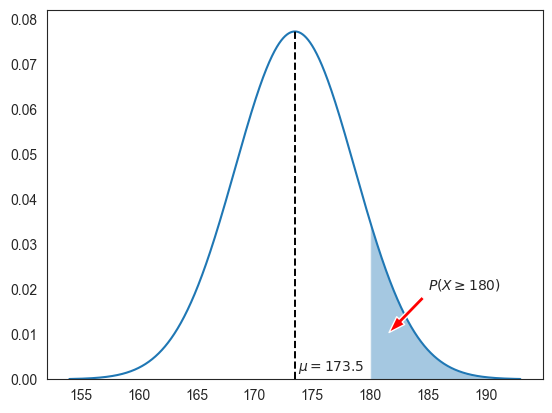

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = np.arange(154, 193, 0.01)
f = lambda y: f_gaussian(y, 173.5, 5.17)

plt.plot(x, f(x))
plt.fill_between(x, f(x), where=(x >= 180), alpha=0.4)

ax.annotate(r'$\mu=173.5$', xy=(173.8 ,0.002))
ax.annotate(r'$P(X \geq 180)$', xy=(181.5 ,0.01), xytext=(185, 0.02),
            arrowprops=dict(facecolor='red', shrink=0.04, width=3, headwidth=8))

ax.plot([173.5, 173.5], [0, f(173.5)], color ='black', linewidth=1.4, linestyle="--")

ax.set_ylim(0, 0.082)

plt.show()

정규 분포의 누적 분포 함수는 `norm.cdf()` 함수가 가리킨다.
`norm.cdf()` 함수 또한 `loc=0`, `scale=1` 두 개의 키워드 인자를 사용한다.
두 키워드 인자의 기능은 `norm.pdf()` 함수와 동일하다.

In [14]:
F_gaussian = norm.cdf

한국 남성의 키를 가리키는 확률 변수 $X$가 정규 분포 $N(173.5, (5.17)^2)$ 을 따를 때
키 180 이상의 남성을 소개팅에서 만날 확률 $P(X \geq 180)$는 다음과 같이 계산된다.

In [15]:
1 - F_gaussian(180, 173.5, 5.17)

0.104331

**예제**

아래 코드는 우연히 만난 한국 남성이 키 180 이상, 185 이하일 확률 $P(180<X<185)$를 그래프로 보여준다.

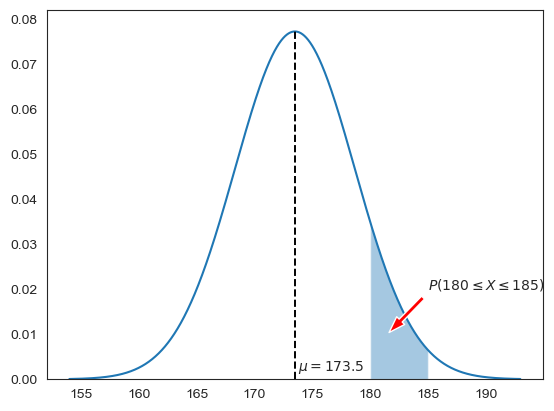

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = np.arange(154, 193, 0.01)
f = lambda y: f_gaussian(y, 173.5, 5.17)

plt.plot(x, f(x))
plt.fill_between(x, f(x), where=(x >= 180) & (x <= 185), alpha=0.4)

ax.annotate(r'$\mu=173.5$', xy=(173.8 ,0.002))
ax.annotate(r'$P(180 \leq X \leq 185)$', xy=(181.5 ,0.01), xytext=(185, 0.02),
            arrowprops=dict(facecolor='red', shrink=0.04, width=3, headwidth=8))

ax.plot([173.5, 173.5], [0, f(173.5)], color ='black', linewidth=1.4, linestyle="--")

ax.set_ylim(0, 0.082)

plt.show()

한국 남성의 키를 가리키는 확률 변수 $X$가 정규 분포 $N(173.5, (5.17)^2)$ 을 따를 때
키 180 이상, 185 이하의 남성을 소개팅에서 만날 확률 $P(180 \leq X \leq 185)$는 다음과 같이 계산된다.

In [17]:
F_gaussian(185, 173.5, 5.17) - F_gaussian(180, 173.5, 5.17)

0.091269

## 확률 변수 표준화

$X \sim N(\mu, \sigma^2)$이 성립한다고 가정했을 때
$X$의 표준 점수는 다음과 같이 정의한다.
단, $\mu$와 $\sigma$는 각각 $X$의 평균값과 표준편차를 가리킨다.

$$
Z = \frac{X-\mu}{\sigma}
$$

확률 변수 $Z$는 이제 표준 정규 분포를 따른다.

$$
Z \sim N(0,1)
$$

예를 들어 한국 남성 키 180과 185의 표준 점수는 다음과 같다.

- 180의 표준점수: 

    $$\frac{180-173.5}{5.17} = 1.257253$$
    
- 185의 표준점수

    $$\frac{185-173.5}{5.17} = 2.224371$$

표준화 이전과 이후의 확률 계산은 따르는 정규 분포만 다를 뿐 결과는 동일하다.

- 키 180 이상일 확률 = 표준 점수가 1.26 이상일 확률

In [18]:
(1 - F_gaussian(180, 173.5, 5.17)) == (1 - F_gaussian((180-173.5)/5.17))

True

- 키 180 이상, 185 이하일 확률 = 표준 점수가 1.257253 이상, 2.224371 이하일 확률

In [19]:
(F_gaussian(185, 173.5, 5.17) - F_gaussian(180, 173.5, 5.17)) == \
(F_gaussian((185 - 173.5)/5.17) - F_gaussian((180 - 173.5)/5.17))

True

## 정규분포 연산

### 합

* 전제
$$X ∼ N(μ_{x}, 𝜎_{x}^{2})$$
$$Y ∼ N(𝑵_{y}, 𝜎_{y}^{2})$$
$$서로\ 독립$$

* 결론
$$⇒\ X+Y ∼N(μ_x+μ_y,\ 𝜎_{x}^{2}+𝜎_{y}^{2})$$
$$⇒\ X-Y ∼N(μ_x-μ_y,\ 𝜎_{x}^{2}+𝜎_{y}^{2})$$

**예제: 신랑, 신부 체중의 합의 분포**

- 전제
  - 신부의 체중 $X ∼ N(150,400)$
  - 신랑의 체중 $Y ∼ N(190, 500)$

  ⇒ 신랑 + 신부의 체중 $∼ N(340,900)\ _{= N(150+190=340,\ \ 400+500,900)}$
> *신랑과 신부의 체중은 서로 독립이라고 가정*

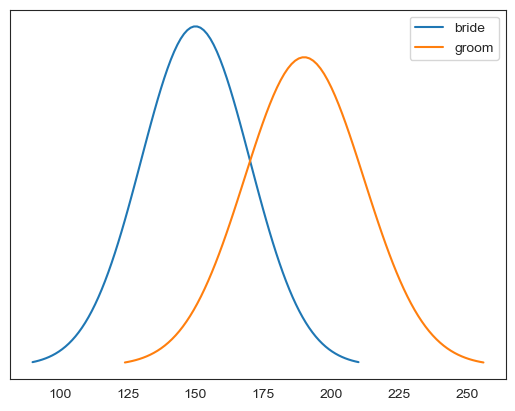

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 정규분포의 평균과 표준편차
mu_w, sigma_w = 150, 20
mu_m, sigma_m = 190, 22

# x축 범위
x = np.linspace(mu_w - 3*sigma_w, mu_w + 3*sigma_w, 100)
x2 = np.linspace(mu_m - 3*sigma_m, mu_m + 3*sigma_m, 100)

# 정규분포 공식을 이용한 y값 계산
y = 1/(sigma_w * np.sqrt(2 * np.pi)) * np.exp(-(x - mu_w)**2 / (2 * sigma_w**2))
y2 = 1/(sigma_m * np.sqrt(2 * np.pi)) * np.exp(-(x2 - mu_m)**2 / (2 * sigma_m**2))

# 그래프 출력
plt.plot(x, y, label="bride")
plt.plot(x2, y2, label="groom")
plt.gca().yaxis.set_visible(False)
plt.legend(loc='upper right')
plt.show()

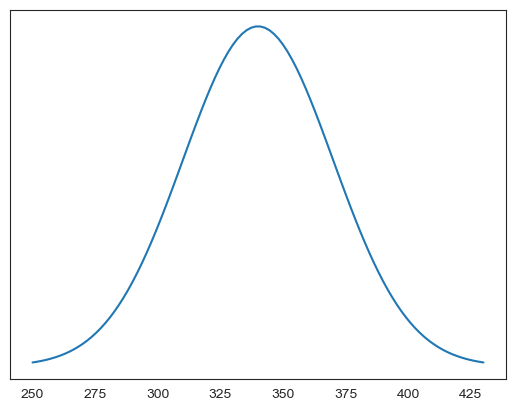

In [21]:
# 신랑 + 신부 
mu, sigma = 340, 30 

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

# 그래프 출력
plt.plot(x, y)
plt.gca().yaxis.set_visible(False)
plt.show()


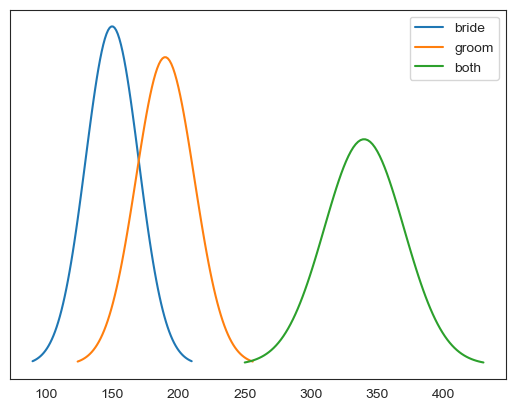

In [22]:
# 전체 비교
mu_w, sigma_w = 150, 20
mu_m, sigma_m = 190, 22
mu_sum, sigma_sum = 340, 30

x = np.linspace(mu_w - 3*sigma_w, mu_w + 3*sigma_w, 100)
x2 = np.linspace(mu_m - 3*sigma_m, mu_m + 3*sigma_m, 100)
x3 = np.linspace(mu_sum - 3*sigma_sum, mu_sum + 3*sigma_sum, 100)

y = 1/(sigma_w * np.sqrt(2 * np.pi)) * np.exp(-(x - mu_w)**2 / (2 * sigma_w**2))
y2 = 1/(sigma_m * np.sqrt(2 * np.pi)) * np.exp(-(x2 - mu_m)**2 / (2 * sigma_m**2))
y3 = 1/(sigma_sum * np.sqrt(2 * np.pi)) *np.exp(-(x3 - mu_sum)**2 / (2 * sigma_sum**2))

# 그래프 출력
plt.plot(x, y, label="bride")
plt.plot(x2, y2, label="groom")
plt.plot(x3, y3, label="both")
plt.gca().yaxis.set_visible(False)
plt.legend(loc='upper right')
plt.show()

"신랑 + 신부"의 모양이 보다 납작해진다. 이유는 분산이 커지기 때문이다

연속데이터를 다루는 두 정규분포의 합도 연속데이터를 다루는 정규분포를 따른다.    
또한, 새로운 정규분포의 기대치와 분산은 각각의 기대치 또는 분산을 이용하여 아래와 같이 구한다.

- 전제 : $X ∼N(μ_x, 𝜎^2_x), Y ∼ N(μ_y, 𝜎_y^2)\ \ \ _{(서로\ 독립)}$
- 결론 :  $⇒ \begin{pmatrix} 
E(X+Y) = μ_x+μ_y,\ \  Var(X+Y)=Var(X)+Var(Y) \\
X+Y ∼N(μ_x+μ_y,\ \  𝜎_x^2+𝜎_y^2)
\end{pmatrix}$

신부와 신랑의 체중의 합이 380 파운드 이하일 확률은?

$$
P(X+Y<380)= P(Z<\frac{380-340}{30})=P(Z<1.33)=0.9082
$$

### 차이

**예제: 결혼 중매 참여 남자, 여자의 키 차이**

- 전제
  - 남자의 키 $X ∼ N(71, 20.25)$
  - 여자의 키 $Y ∼ N(64,16)$

- 결론     
  ⟹ 남자의 키와 여자의 키의 차이의 분포 $∼N(7, 36.25)_{=N(71-64, 20.25+16)}$

> 남자와 여자의 키는 서로 독립이라고 가정

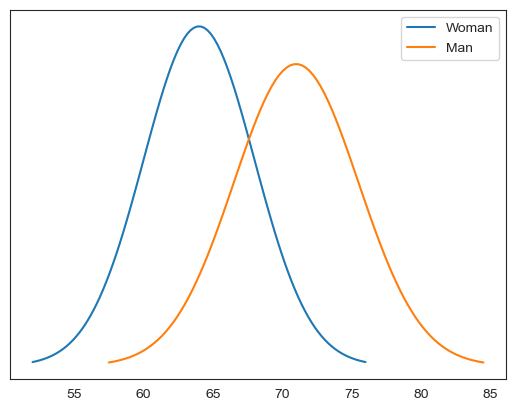

In [23]:
mu_w, sigma_w = 64, 4
mu_m, sigma_m = 71, 4.5 

x = np.linspace(mu_w - 3*sigma_w, mu_w + 3*sigma_w, 100)
x2 = np.linspace(mu_m - 3*sigma_m, mu_m + 3*sigma_m, 100)

y = 1/(sigma_w * np.sqrt(2 * np.pi)) * np.exp(-(x - mu_w)**2 / (2 * sigma_w**2))
y2 = 1/(sigma_m * np.sqrt(2 * np.pi)) * np.exp(-(x2 - mu_m)**2 / (2 * sigma_m**2))

plt.plot(x, y, label="Woman")
plt.plot(x2, y2, label="Man")
plt.gca().yaxis.set_visible(False)
plt.legend(loc='upper right')
plt.show()

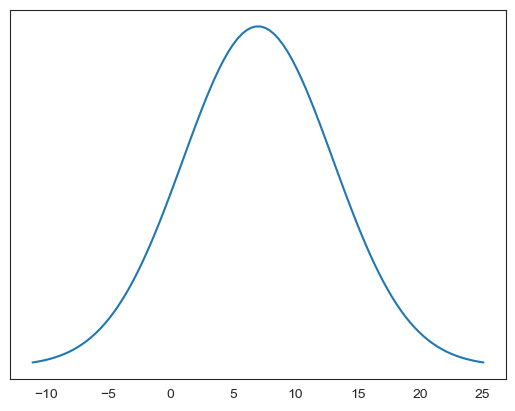

In [24]:
#  남자 + 여자
mu, sigma = 7, 6.02

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

# 그래프 출력
plt.plot(x, y)
plt.gca().yaxis.set_visible(False)
plt.show()

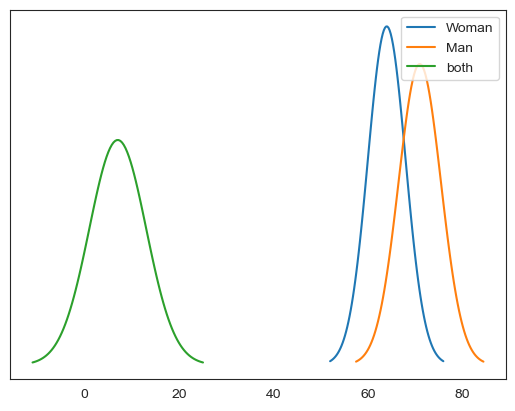

In [26]:
# 전체 비교
mu_w, sigma_w = 64, 4
mu_m, sigma_m = 71, 4.5
mu_sum, sigma_sum = 7, 6.02

x = np.linspace(mu_w - 3*sigma_w, mu_w + 3*sigma_w, 100)
x2 = np.linspace(mu_m - 3*sigma_m, mu_m + 3*sigma_m, 100)
x3 = np.linspace(mu_sum - 3*sigma_sum, mu_sum + 3*sigma_sum, 100)

y = 1/(sigma_w * np.sqrt(2 * np.pi)) * np.exp(-(x - mu_w)**2 / (2 * sigma_w**2))
y2 = 1/(sigma_m * np.sqrt(2 * np.pi)) * np.exp(-(x2 - mu_m)**2 / (2 * sigma_m**2))
y3 = 1/(sigma_sum * np.sqrt(2 * np.pi)) *np.exp(-(x3 - mu_sum)**2 / (2 * sigma_sum**2))

# 그래프 출력
plt.plot(x, y, label="Woman")
plt.plot(x2, y2, label="Man")
plt.plot(x3, y3, label="both")
plt.gca().yaxis.set_visible(False)
plt.legend(loc='upper right')
plt.show()

"남자 - 여자"의 모양이 보다 납작해진다. 이유는 분산이 커지기 때문이다.

연속데이터를 다루는 두 정규분포의 차이도 연속데이터를 다루는 정규분포를 따른다.    
또한, 새로운 정규분포의 기대치와 분산은 각각의 기대치 또는 분산을 이용하여 아래와 같이 구한다.

- 전제 : $X ∼N(μ_x, 𝜎^2_x), Y ∼ N(μ_y, 𝜎_y^2)\ \ \ _{(서로\ 독립)}$
- 결론 :  $⇒ \begin{pmatrix} 
E(X-Y) = μ_x-μ_y,\ \  Var(X-Y)=Var(X)+Var(Y) \\
X-Y ∼N(μ_x-μ_y,\ \  𝜎_x^2+𝜎_y^2)
\end{pmatrix}$

남자와 여자의 키의 차이가 5인치 이상일 확률은?

$$
P(X-Y>5)= P(Z>\frac{5-7}{6.02})=P(Z>-0.33)=P(Z<0.33)=0.6293
$$

주의사항: 정규 분포 그래프는 평균을 중심으로 해서 좌우 대칭

### 정규 분포 선형 변환

* 전제
$$X ∼ N(μ, 𝜎^{2})$$

* 결론
$$⇒\ aX+b ∼ N(aμ+b,\ a^{2}𝜎)$$

X가 한국인 성인 한 명의 체중이라고 하면 **정규분포**를 따른다.    
체중의 평균이 μ, 분산은 $𝜎^2$라 하자. 즉 다음이 성립한다.

$$
X ∼ N(μ,𝜎^2)
$$

이제, 중력이 지구의 4배인 행성이 있고 모든 한국인이 그 행성으로 이주했다고 가정하자.      
그러면 모든 한국인의 체중이 지구에서의 체중의 4배로 늘어난다. 따라서 체중의 평균도 4배, 즉 4μ가 된다.

반면에, 체중의 분산은 지구에서의 경우보다 $4^2배,\ 즉\ 16𝜎^2$이 된다.

따라서, 새로운 행성에서의 한국인 체중은 아래의 분포를 따른다

$$
4X∼ N(4μ,16𝜎^2)
$$

$4X$는 사람들의 체중이 4배되었음을 의미한다.

이렇게 기존에 사용된 데이터가 $ax+b의\ 방식으로\ 변하면,\ _{(기존\ 데이터의\ 각각의\ 값을\ a배한\ 후\ b를\ 더해주는\ 방식)}$,
즉, **선형 변환**을 하면 새로운 데이터의 평균과 분산은 아래와 같이 변한다.

$$
aX+b ∼ N(a⋅μ+b,\ \ a^2𝜎^2)
$$

### 정규 분포의 독립 관측

* 전제
$$X ∼ N(μ, 𝜎^{2})$$
$$⇒ X_{1}, ⋯, X_ n\ 모두\ X의\ 독립\ 관측$$ 

* 결론
$$X_1+⋯+X_n ∼ N(nμ, n𝜎^2)$$

X가 한국인 성인 한 명의 체중이라고 하면 **정규분포**를 따른다.    
체중의 평균이 μ, 분산은 $𝜎^2$라 하자. 즉 다음이 성립한다.

$$
X ∼ N(μ,𝜎^2)
$$

이제, <u>한국인 성인 4명을 무작위로, 그리고 서로 독립적으로 선발</u>하였을 때 4명 체중의 합의 평균은 4μ이다.

또한, 4명 체중의 합의 분산도 $4𝜎^2$이 된다.

무작위적이며 서로 독립적인 방식으로 4명을 선택하여 합한 체중의 분포를 $X+X+X+X$로 표기한다

> $X+X+X+X$는 4명을 무작위적이며, 서로 아무 상관없이 독립적으로 선택한다는 의미

이때 $X+X+X+X ∼ N(4μ,4𝜎^2)$이 성립한다.

일반적으로 아래 공식이 성립한다.

$$
X_1+X_2+⋯+X_n ∼ N(nμ,n𝜎^2)
$$

단, $X_i$는 모두 $X$의 독립관측이다. ($X$를 독립적으로 $n$번 반복한다는 의미)

## 정규분포 활용

### 이항 분포 확률 계산

* 전제
$$X ∼ B(n,p)$$
$$n⋅p > 5$$
$$n(1-p) > 5$$

* 결론
$$⇒ X ∼ N(n⋅p, n⋅p⋅q)$$
$$_{단,\ q=1-p}$$
$$_{주의:\ 연속성\ 보정\ 필요}$$

**예제: 4지선다 40문제를 무작정 찍어서 30문제 이상 맞힐 확률은?**

- 이항분포 문제: $X ∼ B(40, 0.25)$

하지만 40문제 중 30문제 이상 맞힐 확률은 아래와 같이 계산

$$
^{40}C_{30}⋅(\frac{1}{4})^{30}⋅(\frac{3}{4})^{10}+^{40}C_{31}⋅(\frac{1}{4})^{31}⋅(\frac{3}{4})^{9}+⋯+^{40}C_{40}⋅(\frac{1}{4})^{40}
$$

그런데, 이런 과정은 너무 수고스럽거나, 너무 오래걸리거나, 경우에 따라 계산 불가능.
$n!$등을 계산해야 하는데 $n$이 너무 클 경우, 컴퓨터를 이용해도 계산이 불가능한 경우 존재

**주의**

이 문제의 경우 푸아송분포를 활용하더라도 별 도움이 되지 않는다.    
푸아송분포 역시 많은 경우에 따라 실질적으로 불가능한 계산이 요구되기 때문이다.

**대안: 정규분포 활용**

$X ∼B(n,p)$이고, $n⋅p>5$와 $n⋅q>5\ \ _{(q=1-p)}$라면, $X ∼N(n⋅p, n⋅p⋅q)$를 이용해서 이항분포에 대한 대략적인 값을 구할 수 있다.

**주의사항**

이항분포를 정규분포로 대체하여 확률을 계산할 때 주의할 점이 하나 있다.

예제: 2지선다 12개의 문제 중 5개 이하의 문제를 맞힐 확률 계산    

답: 

$X ∼ B(12, \frac{1}{2})$가 성립

따라서, 1️⃣

$\begin{pmatrix} 
P(X<6)=P(x=0)+⋯+P(x=5) \\
=^{12}C_{0}⋅(0.5)^{12}+^{12}C_{1}⋅(0.5)^{12}+⋯+^{12}C_{5}⋅(0.5)^{12} \\
= 0.387
\end{pmatrix}$     

반면에, $12⋅\frac{1}{2}=6>5$가 성립하여, $P(X<6)$를 계산하기 위해     
$X ∼N(6,3)$을 활용할 수 있다.     
그런데 아래 계산이 기대와는 다른 결과를 보여준다.    
2️⃣ $P(X<6)=P(Z<\frac{6-6}{\sqrt{3}})=p(Z<0)=0.5$   

**1️⃣과 2️⃣의 결과가 다르다!**

위의 경우 정규분포를 사용하여 이항분포의 확률을 계산해도 된다고 하였는데,    
전혀 비슷하지 않은 결과가 나왔다. **이유는?**

**이산데이터와 정규데이터의 차이점**

1️⃣ $X ∼ B(12, 0.5)$일 때 $P(X<6)$은 아래 그래프에서 빨간색으로 칠해진 면적에 대응

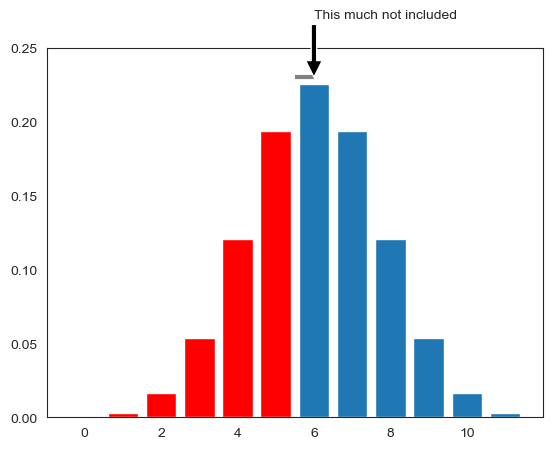

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

def bin_dist(k, n, p):
    nck = factorial(n) / (factorial(k) * factorial(n - k))
    pd = nck * p**k * (1-p)**(n-k)
    return pd

x = np.arange(12)
pd1 = np.array([bin_dist(k, 12, 0.5) for k in range(12)])
cond =  np.array([bin_dist(k, 12, 0.5) for k in range(6)])
x_cond = np.arange(6)
plt.ylim(0, 0.25)
plt.bar(x, pd1)
plt.bar(x_cond, cond, color="red")

plt.hlines(0.23, 5.5, 6, color='gray', linestyle='solid', linewidth=3)
plt.annotate('This much not included', xy=(6, 0.23), xytext=(6, 0.27), arrowprops={'facecolor':'k'})

plt.show()


2️⃣ $X ∼ N(6, 3)$일 때 $P(X<6)$은 아래 그래프에서 빨간색으로 칠해진 면적에 대응


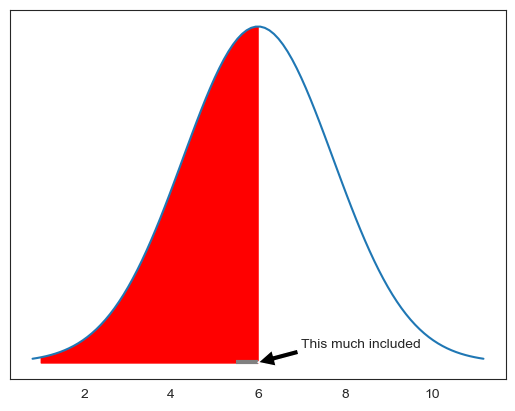

In [29]:
mu, sigma = 6, 1.73
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

plt.plot(x, y)
plt.gca().yaxis.set_visible(False)

x = np.arange(1, 6, 0.01)
plt.fill_between(x, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2)), color='r')

plt.hlines(0, 5.5, 6, color='gray', linestyle='solid', linewidth=3)
plt.annotate('This much included', xy=(6, 0), xytext=(7, 0.01), arrowprops={'facecolor':'k'})

plt.show()

- **결론**    
1️⃣과 2️⃣를 비교해 보면 이산데이터의 경우와 연속데이터의 경우 확률을 계산할 때 약간의 **차이가 발생**할 수 있음을 알 수 있다.

---

**연속성 보정**

앞서 설명에 따라 이산 확률 분포에 대한 확률을 연속 확률 분포를 이용하여 계산하고자 할 때 발생하는 차이를 보정해주는 과정이 필요하다.
이를 **연속성 보정**이라 부르며, 이산된 값들을 연속 눈금 위로 옮길 때 반드시 수행해야 하는 간단한 **눈금조절**을 의미한다.

앞에 언급한 예제의 경우, 정규분포 확률을 계산할 때, $P(X<6)$대신에 $P(X<5.5)$를 계산하여 그래프를 이용한 설명에서 보여준 차이에 대한 보정이 이루어진다.

실제로 $X ∼ N(6,3)$일 때,    

$$
P(X<5.5) = P(Z<\frac{5.5-6}{\sqrt{3}})=P(Z<-0.29)=1-P(Z<0.29)=1-0.6141=0.3859
$$

이며, 이 값은 이항분포에서 직접 계산한 값인 **0.387과 매우 비슷**하다.

**예제: 2지선다 12문제를 찍어서 9문제 이상 맞힐 확률**

답:

이항분포로 계산할 경우에는 

$$
P(X>8)=P(X≥9)=^{12}C_{9}⋅(\frac{1}{2})^{12}+⋯+^{12}C_{12}⋅(\frac{1}{2})^{12}
$$

를 계산해야 함.
하지만, 정규분포 $N(6,3)$을 활용할 경우 $P(X>8.5)\ \ _{⟵ 연속성 보정\ \ \ \ \ \ \  \ }$를 계산해야 함

**예제: 2지선다 12문제를 찍어서 2개 또는 3개 맞힐 확률**

답:

이항분포로 계산할 경우에는 

$$
P(2≤X≤3)=P(1<X<4)=^{12}C_{2}⋅(\frac{1}{2})^{12}+^{12}C_{3}⋅(\frac{1}{2})^{12}
$$

를 계산해야 함.
하지만 정규분포 $N(6,3)$을 활용할 경우 $P(1.5<X<3.5)\ \ _{⟵ 연속성 보정\ \ \ \ \ \ \  \ }$를 계산해야 함

### 연속성 보정 일반화

$X ∼ B(n,p)$이며, $n⋅p>5,\ n⋅q>5$도 성립하면 $X ∼ N(np, npq)$가 성립한다.
1. 이항분포에서 $P(X≤a)$를 계산하고자 할 때 정규분포에서 $P(X<a+0.5)$를 계산한다.
2. 이항분포에서 $P(X≥a)$를 계산하고자 할 때 정규분포에서 $P(X>a-0.5)$를 계산한다.
3. 이항분포에서 $P(a≤X≤b)$를 계산하고자 할 때 정규분포에서 $P(a-0.5<X<b+0.5)$를 계산한다.

### 푸아송 분포 확률 계산

* 전제
$$X ∼ P_{0}(𝜆)$$
$$𝜆>15$$

* 결론
$$X ∼ N(𝜆,𝜆)$$
$$_{주의:\ 연속성\ 보정\ 필요}$$

**예제**

러브트레인이라는 롤러코스터가 1년에 고장나는 횟수가 𝜆=40일 때, 1년에 52회 미만으로 고장날 확률은 얼마인가?

답:

$X$가 1년에 고장나는 횟수를 나타내면 $X ∼P_0(40)$이다.   
$𝜆>15$이므로 $X∼N(40, 40)$이 성립한다.    
따라서 푸아송분포에서 $P(X<52)$는 정규분포에서 

$$
P(Z<\frac{51.5-40}{\sqrt{40}})=P(Z<1.82)=0.9656
$$

이다.   

이항분포의 경우처럼 연속성 보정을 사용하는 것에 주의해야 한다.

## 연습문제

참고: [(연습) 정규 분포](https://colab.research.google.com/github/codingalzi/DataSci/blob/master/practices/practice-normal_distribution.ipynb)